# **Virat-Kohli-All-International-Cricket-Centuries**


In [44]:
# importing necessary Libraries--
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# importing Warnings modules--
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive--
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Loading Dataset--

df = pd.read_csv('/content/Virat-Kohli-International-Cricket-Centuries.csv', encoding='latin-1')

In [4]:
df.head()
# Seeing the first 5 records.

,ï»¿No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,24-Dec-09,Won
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,11-Jan-10,Won
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,20-Oct-10,Won
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,28-Nov-10,Won
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,19-Feb-11,Won


In [5]:
df.shape
# Check for No. of Rows and Columns.

(80, 9)

In [6]:
df.info()
# Get a summary of data types and non-null values for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ï»¿No.    80 non-null     int64 
 1   Runs      80 non-null     object
 2   Against   80 non-null     object
 3   Position  80 non-null     int64 
 4   Innings   80 non-null     int64 
 5   Venue     80 non-null     object
 6   Ground    79 non-null     object
 7   Date      80 non-null     object
 8   Result    80 non-null     object
dtypes: int64(3), object(6)
memory usage: 5.8+ KB


In [7]:
df.describe()
# Get a statistical summary for all numerical columns

,ï»¿No.,Position,Innings
count,80.0000,80.000000,80.00000
mean,40.5000,3.500000,1.67500
std,23.2379,0.656033,0.67082
min,1.0000,2.000000,1.00000
25%,20.7500,3.000000,1.00000
50%,40.5000,3.000000,2.00000
75%,60.2500,4.000000,2.00000
max,80.0000,6.000000,4.00000


In [8]:
df.columns

Index(['ï»¿No.', 'Runs', 'Against', 'Position', 'Innings', 'Venue', 'Ground',
       'Date', 'Result'],
      dtype='object')

In [9]:
df.isnull().sum()
# Check a Count of Missings values.

,0
ï»¿No.,0
Runs,0
Against,0
Position,0
Innings,0
Venue,0
Ground,1
Date,0
Result,0


In [10]:
# Ground Column contains 1 missing value
df['Ground'].fillna(df['Ground'] == 'Unknown', inplace = True)
# Filling Missing value, here in 'Ground' Column.

In [12]:
df.info()
# Checking for the Wrong Data types-

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ï»¿No.    80 non-null     int64 
 1   Runs      80 non-null     object
 2   Against   80 non-null     object
 3   Position  80 non-null     int64 
 4   Innings   80 non-null     int64 
 5   Venue     80 non-null     object
 6   Ground    80 non-null     object
 7   Date      80 non-null     object
 8   Result    80 non-null     object
dtypes: int64(3), object(6)
memory usage: 5.8+ KB


In [13]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Converting 'Date' Column Data type into 'datetime'.

In [14]:
df.duplicated().sum()
# There is No duplicate value present.

np.int64(0)

# Now we see some of Virat Kholi's Performance in his International Career via Data Visualization

_______________________________________________

**1. Performance Trends Over Time:** Analyze how Kohli's centuries have varied year by year to identify peaks or slumps in his batting form.

__________________________________________________

In [15]:
# Extract year from Date
df['Year'] = df['Date'].dt.year

In [16]:
# Count centuries per year
centuries_per_year = df.groupby('Year').size().reset_index(name='Century Count')

In [17]:
centuries_per_year

,Year,Century Count
0,2009.0,1
1,2010.0,3
2,2011.0,4
3,2012.0,8
4,2013.0,6
5,2014.0,8
6,2015.0,4
7,2016.0,7
8,2017.0,11
9,2018.0,11


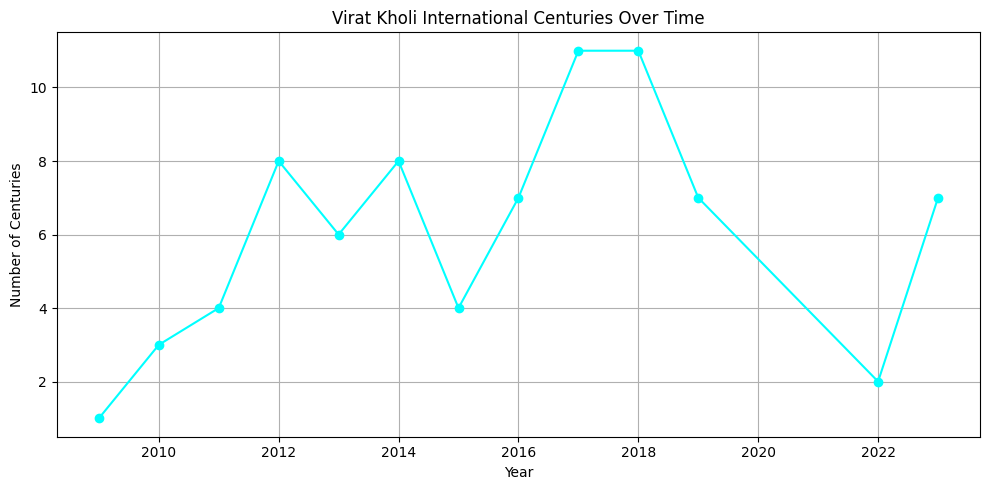

In [48]:
# Visualizing his Milestones over time by Line Chart--
plt.figure(figsize = (10,5))
plt.plot(centuries_per_year['Year'],centuries_per_year['Century Count'], marker = 'o', linestyle = '-', color = 'cyan')
plt.xlabel('Year')
plt.ylabel('Number of Centuries')
plt.title('Virat Kholi International Centuries Over Time')
plt.grid(True) # Gridlines
plt.tight_layout()
plt.show()

**Inference :**
The Line Charts above clearly shows variation in Virat Kholi's International Cricketing Career as Virat Kohli's international centuries peaked between 2017 and 2018, showing remarkable consistency during those years; after a noticeable dip in 2022, there was a strong recovery in 2023, highlighting resilience and a return in form.


_______________________________________________

**2. Century Distribution by Opponent:** Study which teams he scored the most centuries against.

___________________________________________________

In [19]:
# Cleaning the 'Against' Column by removing any leading or trailing Whitespaces.
df['Against'] = df['Against'].str.strip()

In [20]:
# Centuries per Opponent
Centuries_by_Opponent = df['Against'].value_counts().reset_index()
Centuries_by_Opponent.columns = ['Opponent', 'Total Century']

In [21]:
Centuries_by_Opponent

,Opponent,Total Century
0,Australia,16
1,Sri Lanka,15
2,West Indies,12
3,New Zealand,9
4,South Africa,8
5,England,8
6,Bangladesh,7
7,Pakistan,3
8,Zimbabwe,1
9,Afghanistan,1


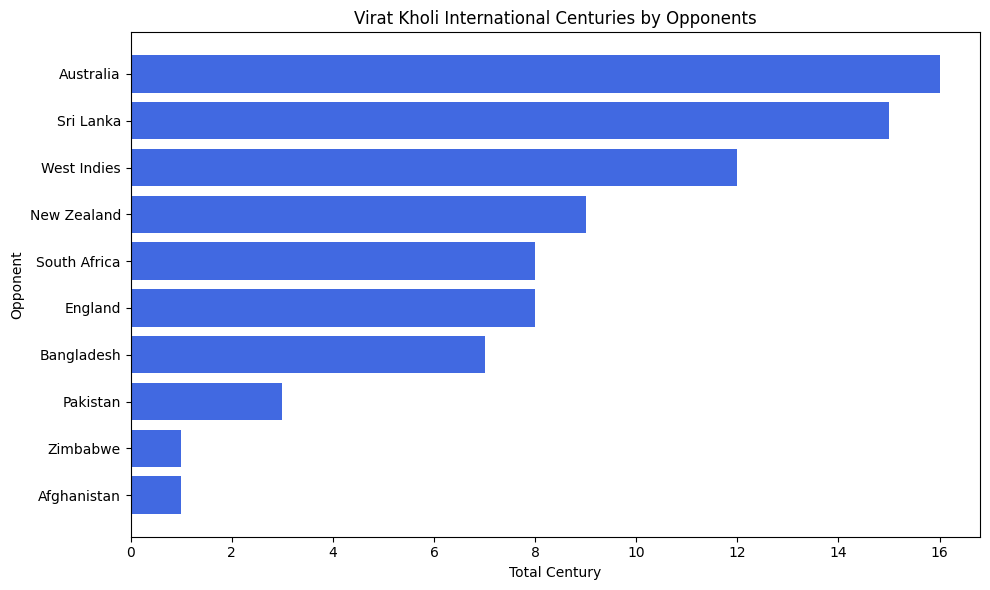

<Figure size 640x480 with 0 Axes>

In [49]:
# Visualizing his Records on Bar Grahph--
plt.figure(figsize=(10, 6))
plt.barh(Centuries_by_Opponent['Opponent'], Centuries_by_Opponent['Total Century'], color = 'royalblue') # Plotting Horizontaly.
plt.xlabel('Total Century')
plt.ylabel('Opponent')
plt.title('Virat Kholi International Centuries by Opponents')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Inference :**
The Bar Graph above clearly shows that Virat Kohli has scored the most international centuries against Australia, followed closely by Sri Lanka and West Indies, indicating he performs especially well against these major cricket teams, while his century count is noticeably lower against teams like Zimbabwe, Afghanistan, and Pakistan.

_________________________________________________

**3. Home vs Away Performance:** Compare centuries scored in home matches versus away matches.

__________________________________________________

In [23]:
# Remove extra spaces in 'Ground' column and classify venue types
df['Ground'] = df['Ground'].str.strip()

In [24]:
# Calculating Virat Kholi Perfromance on Home Vs Away Soil.
home_vs_away_performance = df['Ground'].value_counts().reset_index()
home_vs_away_performance.columns = ['Venue Type', 'Century Count']


In [25]:
home_vs_away_performance

,Venue Type,Century Count
0,Home,37
1,Away,36
2,Neutral,6


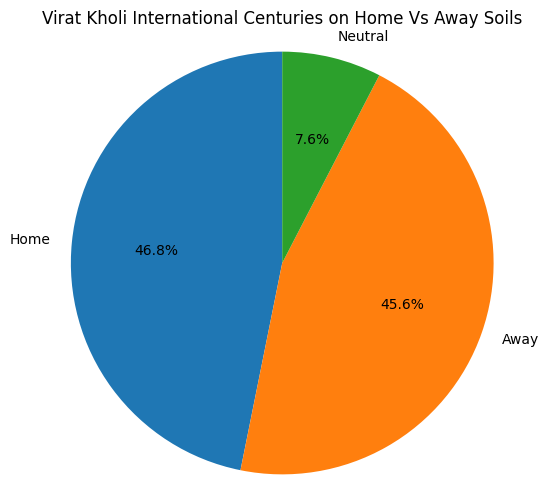

In [26]:
# Visualizing Virat Kholi's Home Vs Away soil Performance
plt.figure(figsize = (6,6))
plt.pie(home_vs_away_performance['Century Count'], labels = home_vs_away_performance['Venue Type'], autopct = '%1.1f%%', startangle = 90)
plt.title('Virat Kholi International Centuries on Home Vs Away Soils')
plt.axis('equal')
plt.show()

**Inference :** Virat Kohli has scored almost equal proportions of his international centuries at home (46.8%) and away (45.6%), with a smaller fraction (7.6%) on neutral venues, demonstrating his consistent batting performance irrespective of location

_______________________________________

**4. Venue-wise Analysis:** Identify the grounds where he has scored the most centuries.

________________________________________

In [27]:
# Cleaning the 'Venue' Column
df['Venue'] = df['Venue'].str.strip()

In [28]:
# Counting Each Unique Grounds where he Scored Century
Venue_wise_Centuries = df.groupby('Venue')['Runs'].size().reset_index(name = 'Total Century').sort_values(by = 'Total Century', ascending = False)

In [29]:
# Taking Only Top 20 Venues.
Top_20_Venues = Venue_wise_Centuries.head(20)

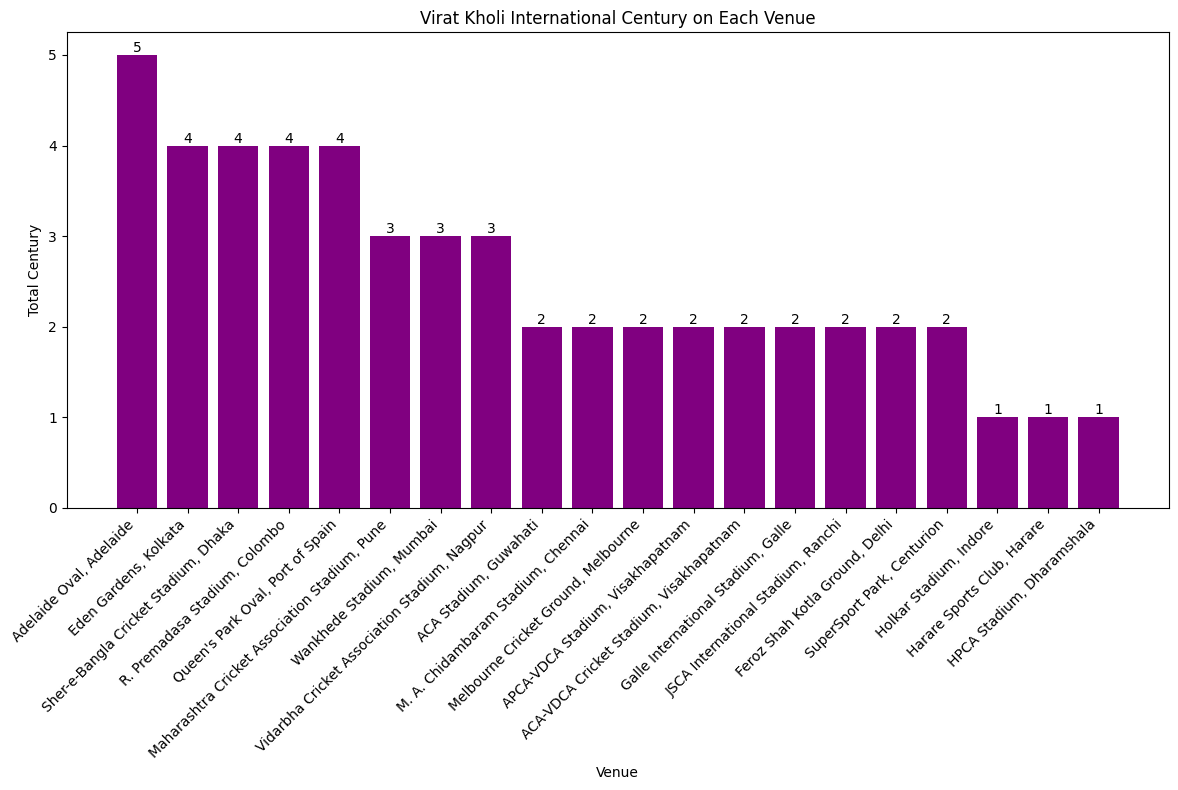

In [30]:
# Visualizing Virat Kholi's benchmark on Various Venues--
plt.figure(figsize = (12,8))
bars = plt.bar(Top_20_Venues['Venue'], Top_20_Venues['Total Century'], color = 'purple')
plt.title('Virat Kholi International Century on Each Venue')
plt.xticks(rotation = 45, ha = 'right') # Labels tilted 45° and aligned to the right.
plt.bar_label(bars, label_type = 'edge') # Add text labels to Bars, 'edge' means place at top of the Bar
plt.xlabel('Venue')
plt.ylabel('Total Century')
plt.tight_layout()
plt.show()

**Inference :** Virat Kohli has scored the most international centuries at Adelaide Oval (5), with several other venues like Eden Gardens, Shere-Bangla, R. Premadasa, Queen's Park Oval, and Wankhede each hosting 4 of his centuries, showing he has achieved major milestones across a diverse set of international grounds

___________________________________________________

5. **Impact on Match Result:** Analyze whether his centuries contributed more to wins, losses, or draws.

_____________________________________________________

In [31]:
df.head()

,ï»¿No.,Runs,Against,Position,Innings,Venue,Ground,Date,Result,Year
0,1,107,Sri Lanka,4,2,"Eden Gardens, Kolkata",Home,2009-12-24,Won,2009.0
1,2,102*,Bangladesh,3,2,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2010-01-11,Won,2010.0
2,3,118,Australia,3,2,"APCA-VDCA Stadium, Visakhapatnam",Home,2010-10-20,Won,2010.0
3,4,105,New Zealand,3,1,"Nehru Stadium, Guwahati",Home,2010-11-28,Won,2010.0
4,5,100*,Bangladesh,4,1,"Sher-e-Bangla Cricket Stadium, Dhaka",Away,2011-02-19,Won,2011.0


In [32]:
result_count = df['Result'].value_counts().reset_index()
result_count.columns = ['Result', 'Century Count']

In [33]:
print(result_count)

       Result  Century Count
0         Won             55
1        Lost             13
2       Drawn              9
3  Lost (D/L)              1
4   Won (D/L)              1
5        Tied              1


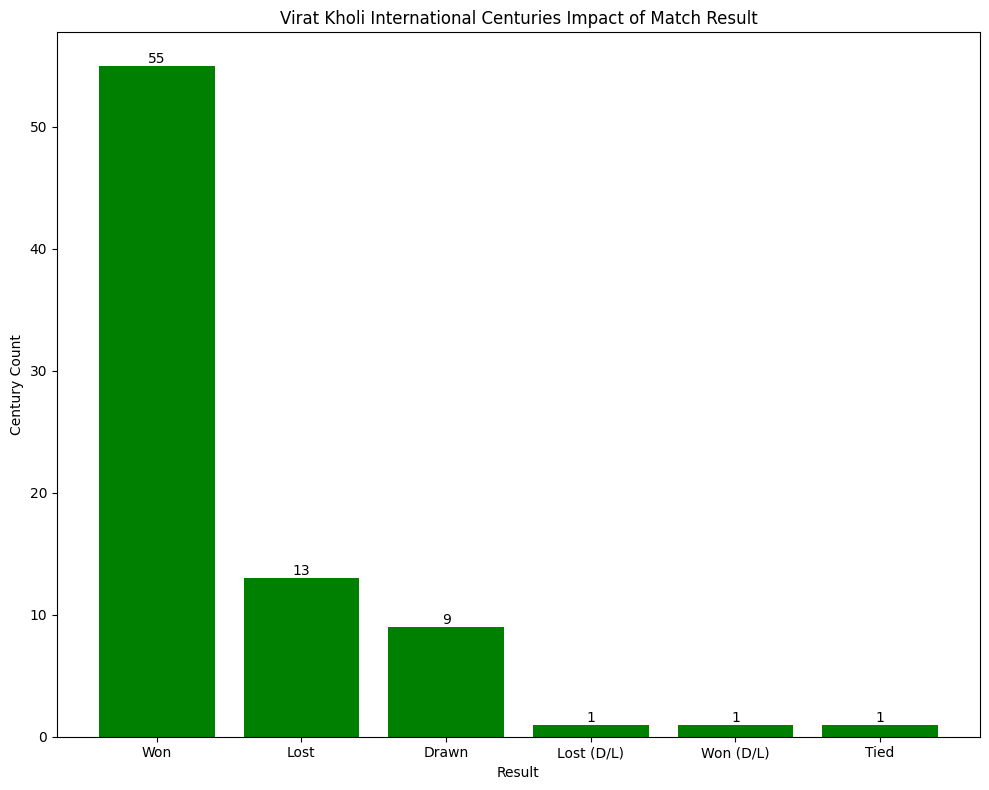

In [34]:
# Visualizing Virat Kholi Centuries impact on Match Result --
plt.figure(figsize = (10,8))
bars = plt.bar(result_count['Result'], result_count['Century Count'], color = 'green')
plt.title('Virat Kholi International Centuries Impact of Match Result')
plt.xlabel('Result')
plt.ylabel('Century Count')
plt.bar_label(bars, label_type = 'edge')
plt.tight_layout()
plt.show()

**Inference :** The vast majority of Virat Kohli's international centuries have come in matches that India won, highlighting the significant positive impact his centuries have on the team's success, while only a small number occurred in matches that were lost, drawn, or tied.

____________________________________________

**6. Runs Scored by Innings Number:** Check if his centuries are more frequent in certain innings position.

In [35]:
Runs_scored_per_innings = df['Innings'].value_counts().reset_index() # Counting Centuries by Innings Position.
Runs_scored_per_innings.columns = ['Innings', 'Total Century']

___________________________________________

In [36]:
Runs_scored_per_innings

,Innings,Total Century
0,2,42
1,1,33
2,3,3
3,4,2


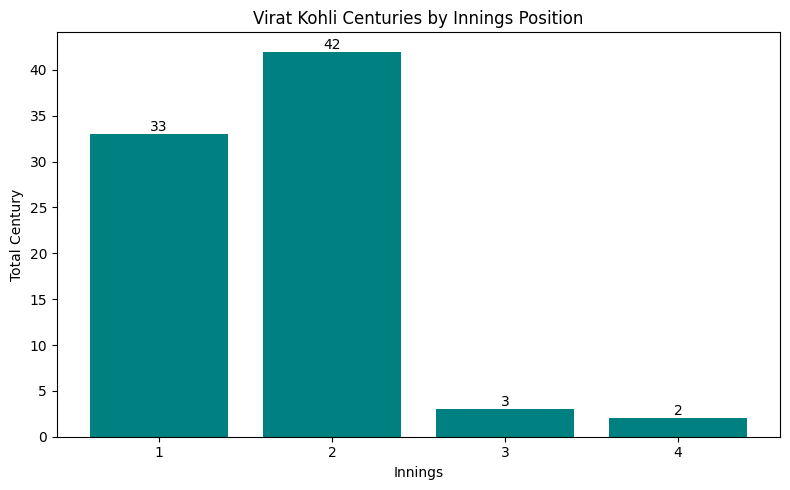

In [37]:
plt.figure(figsize=(8,5))
bars = plt.bar(Runs_scored_per_innings['Innings'], Runs_scored_per_innings['Total Century'], color='teal')
plt.xlabel('Innings')
plt.ylabel('Total Century')
plt.title('Virat Kohli Centuries by Innings Position')
plt.bar_label(bars, label_type = 'edge') # Puting labels on Bars.
plt.xticks(Runs_scored_per_innings['Innings']) # Set explicit x-ticks to ensure integer labels
plt.tight_layout()
plt.show()

**Inference :** Most of Virat Kohli's centuries have been scored in the second innings (42) and first innings (33), with very few centuries in the third and fourth innings, indicating his major impact comes early in matches

_________________________________________

**7. Century Scores Distribution:** Explore the distribution of the runs scored in these centuries (e.g., how many 100s, 150s, 200s).

_____________________________________________

In [38]:
df['Runs'] = df['Runs'].str.replace(r'[^0-9]', '', regex=True) # Removing any other entries except Numbers.
df['Runs'] = pd.to_numeric(df['Runs'], errors = 'coerce') # Conerting Runs to only Numeric

In [39]:
df['Runs']

,Runs
0,107
1,102
2,118
3,105
4,100
...,...
75,121
76,122
77,103
78,101


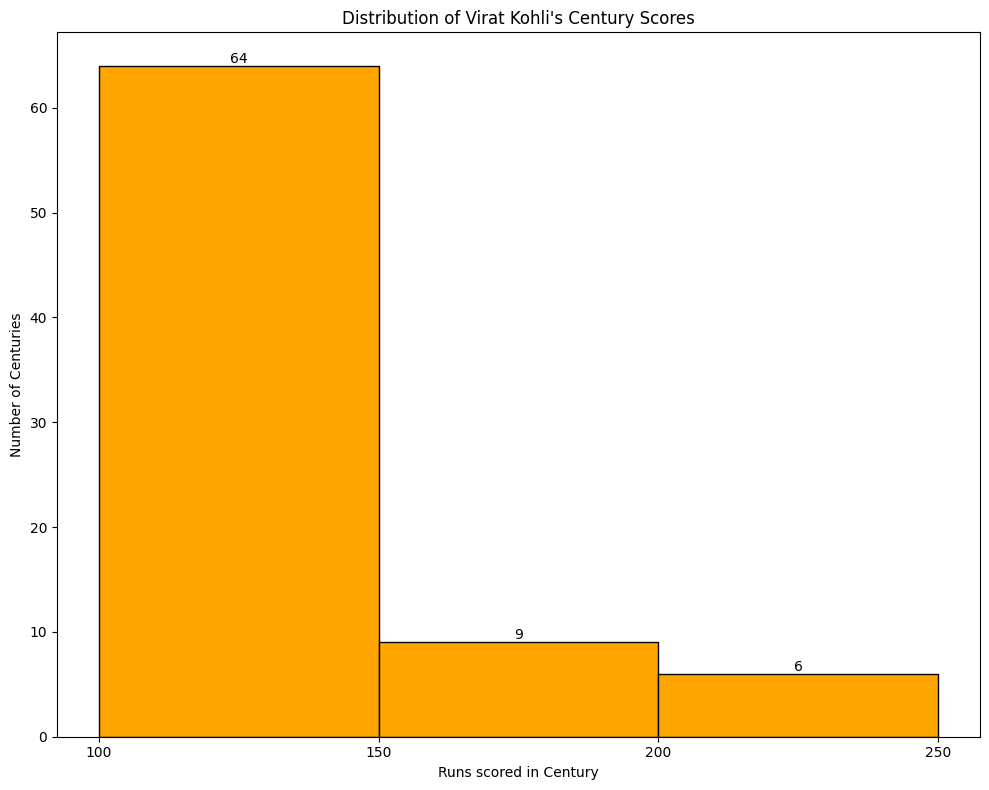

In [42]:
plt.figure(figsize = (10,8))
count, bin, patches = plt.hist(df['Runs'], bins = [100, 150, 200, 250], color = 'orange', edgecolor = 'black')
plt.title("Distribution of Virat Kohli's Century Scores")
plt.xlabel('Runs scored in Century')
plt.ylabel('Number of Centuries')
plt.xticks([100, 150, 200, 250])
plt.bar_label(patches) # To add lebels on Bars.
plt.tight_layout()
plt.show()
# bins - Controls how the data is split into intervals.
# count - Shows the frequencies(no. of values in each bin).
# patches - the bar container.

**Inference :** Most of Virat Kohli's centuries are in the range of 100–150 runs, with far fewer scores above 150 and only a small number reaching or exceeding 200, showing that while he consistently converts starts into centuries, very high individual scores are comparatively rarer for him.